Nama: Fachrizal Taufiq Goe

NIM: H071191008

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./Datasets/Mall_Customers.csv') #Read data dari csv file
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Kita mengambil hanya mengambil nilai dari 'Annual Income (k$)' dan Spending Score (1-100)'

In [3]:
x = df.iloc[:, [3, 4]].values

Kita akan membagi data menjadi 10 cluster
Dari sini kita mendapatkan tabel Elbow

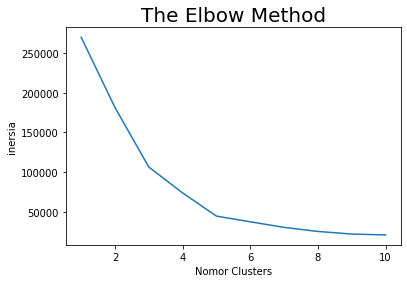

In [4]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x)
    wcss.append(km.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('Nomor Clusters')
plt.ylabel('inersia')
plt.show()

# Algoritma K-means

Berdasarkan tabel diatas dapat kita lihat bahwa kurva dari nomor cluster
Mengalami evisiensi di cluster nomor 5 atau diantara 4 dan 6
Jadi, pada kode berikut kita akan membaginya menjadi 5 cluster

In [5]:
km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

Kita akan menampilkan hasil Clustering dan menamai setiap cluster berdasarkan total pengeluaran dan pendapatan harian menjadi

    Hemat: Pendapatan > total pengeluaran

    Normal: Pendapatan harian = total pengeluaran dalam artian wajar

    Target: Pendapatan harian = total pengeluaran dalam artian tidak wajar (tinggi)

    Hati-hati: Pendapatan harian >= total pengeluaran

    Boros: Pendapatan harian < total pengeluaran

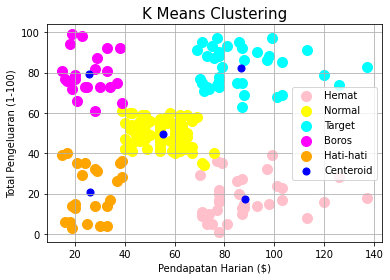

In [6]:
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'pink', label = 'Hemat')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'yellow', label = 'Normal')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'cyan', label = 'Target')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 100, c = 'magenta', label = 'Boros')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 100, c = 'orange', label = 'Hati-hati')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'Centeroid')


plt.title('K Means Clustering', fontsize = 15)
plt.xlabel('Pendapatan Harian ($)')
plt.ylabel('Total Pengeluaran (1-100)')
plt.grid()
plt.legend()
plt.show()

# Hirarki

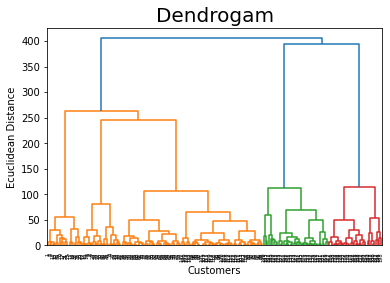

In [7]:
import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(x, method = 'ward'))
plt.title('Dendrogam', fontsize = 20)
plt.xlabel('Customers')
plt.ylabel('Ecuclidean Distance')
plt.show()

Dari tabel diagram diatas kita dapat membagi manjadi 5 bagian yaitu dengan membagi lagi data dengan Eucledian distance 50-100 menjadi 3 cluster dan 2 cluster berkisar di 100

In [8]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(x)

Dapat dilihat dari kode berikut bahwa clustering menggunakan hirarki menghasilkan cluster yang sama

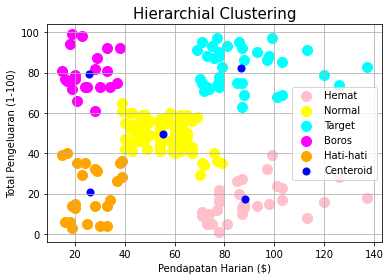

In [9]:
plt.scatter(x[y_hc == 0, 0], x[y_hc == 0, 1], s = 100, c = 'pink', label = 'Hemat')
plt.scatter(x[y_hc == 1, 0], x[y_hc == 1, 1], s = 100, c = 'yellow', label = 'Normal')
plt.scatter(x[y_hc == 2, 0], x[y_hc == 2, 1], s = 100, c = 'cyan', label = 'Target')
plt.scatter(x[y_hc == 3, 0], x[y_hc == 3, 1], s = 100, c = 'magenta', label = 'Boros')
plt.scatter(x[y_hc == 4, 0], x[y_hc == 4, 1], s = 100, c = 'orange', label = 'Hati-hati')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'Centeroid')


plt.title('Hierarchial Clustering', fontsize = 15)
plt.xlabel('Pendapatan Harian ($)')
plt.ylabel('Total Pengeluaran (1-100)')
plt.grid()
plt.legend()
plt.show()